## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Functions

In [2]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('Random Forest Forecast for the Last 24 Observations')
    plt.xlabel('Time')
    plt.ylabel('ASIALNG Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

## Main

In [3]:
df = pd.read_excel("Renamed Columns Stationary Data/ASIALNG.xlsx") 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,ASIALNG,ASIALNG_LAG1,ASIALNG_LAG2,ASIALNG_LAG3,ASIALNG_LAG4,USAGDP,Equity Market Volatility,3 Month Treasury Bill,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,,,,,
1996-07-01,0.002621,0.023906,0.081163,0.000000,-0.099806,0.020675,-4.19,0.09,-0.196710,0,0
1996-10-01,0.109019,0.002621,0.023906,0.081163,0.000000,0.012196,1.94,0.08,0.083382,0,0
1997-01-01,0.002345,0.109019,0.002621,0.023906,0.081163,0.015662,-0.40,-0.12,-0.446287,0,0
1997-04-01,-0.143281,0.002345,0.109019,0.002621,0.023906,0.012380,2.70,0.08,0.782759,0,0
1997-07-01,-0.061301,-0.143281,0.002345,0.109019,0.002621,0.018502,-0.41,-0.01,0.041964,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.553581,-0.148651,-0.112020,0.644932,0.604677,0.020373,-0.43,0.77,-0.083527,1,1
2022-10-01,-0.491094,0.553581,-0.148651,-0.112020,0.644932,0.017477,-3.25,1.58,-0.269102,1,1
2023-01-01,-0.538396,-0.491094,0.553581,-0.148651,-0.112020,0.015792,1.58,1.38,0.005921,1,1


In [4]:
import statsmodels.api as sm


y = df['ASIALNG']
X = df[["ASIALNG_LAG1","ASIALNG_LAG2","ASIALNG_LAG3","ASIALNG_LAG4","USAGDP","Equity Market Volatility","3 Month Treasury Bill","Infectious Disease Tracker","COV19","RUWAR"]]

# Add a constant term to the feature matrix (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ASIALNG   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     7.533
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           8.53e-09
Time:                        15:32:34   Log-Likelihood:                 40.049
No. Observations:                 109   AIC:                            -58.10
Df Residuals:                      98   BIC:                            -28.49
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0131      0.025     -0.532      0.596      -0.062       0.036
ASIALNG_LAG1                   0.2419      0.108      2.239      0.027       0.027       0.456
ASIALNG_LAG2                  -0.3949      0.102     -3.869      0.000      -0.597      -0.192
ASIALNG_LAG3                   0.2398      0.098      2.458      0.016       0.046       0.433
ASIALNG_LAG4                   0.1353      0.102      1.326      0.188      -0.067       0.338
USAGDP                         1.0055      1.509      0.666      0.507      -1.988       3.999
Equity Market Volatility      -0.0036      0.003     -1.144      0.255      -0.010       0.003
3 Month Treasury Bill         -0.0157      0.050     -0.314      0.754      -0.115       0.083
Infectious Disease Tracker    -0.0611      0.039     -1.566      0.121      -0.138       0.016
COV19                          0.2627      0.072      3.626      0.000       0.119       0.407
RUWAR                         -0.4447      0.120     -3.694      0.000      -0.684      -0.206
==============================================================================
Omnibus:                       12.048   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.317
Skew:                          -0.594   Prob(JB):                     0.000472
Kurtosis:                       4.401   Cond. No.                         585.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Droping columns with P > 0.1

In [5]:
selected_columns = ["ASIALNG","ASIALNG_LAG1","ASIALNG_LAG2","ASIALNG_LAG3","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,ASIALNG,ASIALNG_LAG1,ASIALNG_LAG2,ASIALNG_LAG3,COV19,RUWAR
DATE,,,,,,
1996-07-01,0.002621,0.023906,0.081163,0.000000,0,0
1996-10-01,0.109019,0.002621,0.023906,0.081163,0,0
1997-01-01,0.002345,0.109019,0.002621,0.023906,0,0
1997-04-01,-0.143281,0.002345,0.109019,0.002621,0,0
1997-07-01,-0.061301,-0.143281,0.002345,0.109019,0,0
...,...,...,...,...,...,...
2022-07-01,0.553581,-0.148651,-0.112020,0.644932,1,1
2022-10-01,-0.491094,0.553581,-0.148651,-0.112020,1,1
2023-01-01,-0.538396,-0.491094,0.553581,-0.148651,1,1


## Tree

In [6]:
# Splitting the data into train and test sets
train, test = train_test_split(pruned_df, test_size=0.09, shuffle=False)

# Defining features and target
features = ["ASIALNG_LAG1","ASIALNG_LAG2","ASIALNG_LAG3","COV19","RUWAR"]
target = "ASIALNG"

In [7]:
# RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Hyperparameters range for Randomized Search
param_distributions = {
    'n_estimators': [200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 40, 50],
    'min_samples_split': [2, 6, 8],
    'min_samples_leaf': [1, 2, 6],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions, n_iter=500, cv=5, random_state=42, n_jobs=-1)

random_search.fit(train[features], train[target])

C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 486 is smaller than n_iter=500. Running 486 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 6],
                                        'min_samples_split': [2, 6, 8],
                                        'n_estimators': [200, 300, 500]},
                   random_state=42)

In [8]:
# Best model from random search
best_model = random_search.best_estimator_

test['PREDICTED_ASIALNG'] = best_model.predict(test[features])

# Outputting the best parameters
best_params = random_search.best_params_
best_params

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

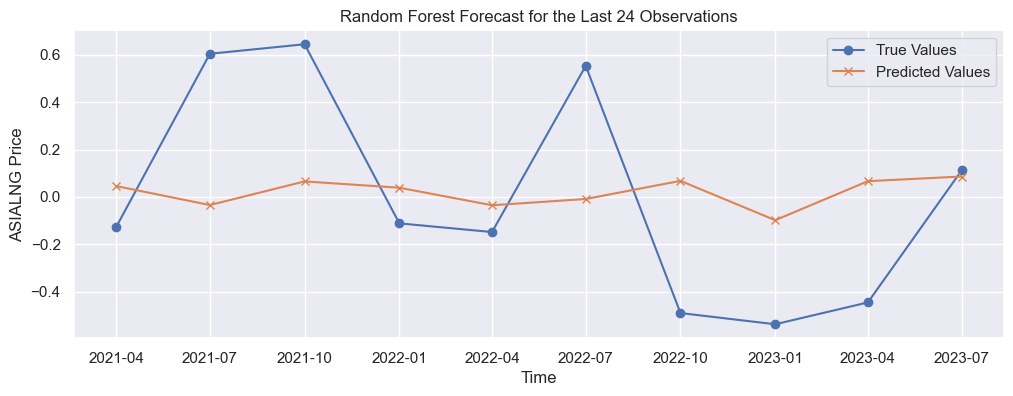

In [9]:
plotFor(test['ASIALNG'],test['PREDICTED_ASIALNG'])

In [10]:
y_test = test['ASIALNG']
predictions = test['PREDICTED_ASIALNG']

In [11]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.3755
MAPE: 97.6876 %
MSE: 0.1896
RMSE: 0.4354


## Saving Prediction

In [12]:
df = pd.DataFrame({'ASIALNG Q RF': predictions, 'Actual': y_test})
df.to_excel("ASIALNG_Q_RF_forecast.xlsx", index=True)
df

,ASIALNG Q RF,Actual
DATE,,
2021-04-01,0.045629,-0.127753
2021-07-01,-0.034693,0.604677
2021-10-01,0.065234,0.644932
2022-01-01,0.038618,-0.112020
2022-04-01,-0.035518,-0.148651
2022-07-01,-0.009090,0.553581
2022-10-01,0.067612,-0.491094
2023-01-01,-0.098682,-0.538396
2023-04-01,0.066255,-0.446175


In [13]:
# Open a file in write mode
with open('ASIALNG Q RF Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')